<a href="https://colab.research.google.com/github/Wisley1/SWW12/blob/main/FirstStepDayOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
# @title data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from google.colab import drive
drive.mount('/content/drive')

valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWW12/US_patents_1976-Sep2016_1product_reactions_yield_ok_cropped_data_valid.csv', sep="\t", index_col=0)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWW12/US_patents_1976-Sep2016_1product_reactions_yield_ok_cropped_data_train.csv',sep="\t", index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWW12/US_patents_1976-Sep2016_1product_reactions_yield_ok_cropped_data_test.csv',sep="\t", index_col=0)

#valid.columns = ['Number', 'myID', 'Source', 'Target', 'CanonicalizedReaction', 'OriginalReaction', 'Yield']
#train.columns = ['Number', 'CanonicalizedReaction', 'Yield']
#test.columns = ['Number', 'myID', 'Source', 'Target', 'CanonicalizedReaction', 'OriginalReaction', 'Yield']

train = train.assign(dataset='train')
test = test.assign(dataset='test')
valid = valid.assign(dataset='valid')

frames = [train, test, valid]
df = pd.concat(frames)
df = df.drop(columns=['myID', 'Source', 'Target', 'OriginalReaction'])
df.head()

df_mid = df
df_mid = df_mid['CanonicalizedReaction'].str.split('>', expand=True)

df['react'] = df_mid.iloc[:, 0]
df['products'] = df_mid.iloc[:, 2]
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(526468, 5)


,CanonicalizedReaction,Yield,dataset,react,products
11,CCOC(=O)CC1(O)Cc2ccccc2N(C)c2ccc(SCC)cc21>CCO....,82.0,train,CCOC(=O)CC1(O)Cc2ccccc2N(C)c2ccc(SCC)cc21,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21
12,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21>CCO.Cl...,78.1,train,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21,CCSc1ccc2c(c1)C(CC(=O)O)=Cc1ccccc1N2C
14,CCSc1ccc2c(c1)C(CC(=O)N(C)C)=Cc1ccccc1N2C>C1CC...,82.1,train,CCSc1ccc2c(c1)C(CC(=O)N(C)C)=Cc1ccccc1N2C,CCSc1ccc2c(c1)C(CCN(C)C)=Cc1ccccc1N2C
23,CC(C)(C)NNC(C)(C#N)C1CC1>BrBr.ClCCl.O>CC(C)(C)...,81.9,train,CC(C)(C)NNC(C)(C#N)C1CC1,CC(C)(C)N=NC(C)(C#N)C1CC1
24,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCCC1>CC(=O)C1...,100.0,train,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCCC1,CC(C)(C)NNC1(C#N)CCCCCCC1


smiles делить по стрелочке
реагент условия продукт
до точки реактант после точки реагент

реактант - молекула органическая с атомами углерода, которая участвует во взаимодействии
реагент - едкий натр участвует но не меняется

посчитать сколько реактантов (1,2,3) в процентах

условия удаляем

распределение выхода

In [286]:
df['num_dots'] = df['react'].str.count('\.')

In [287]:
df['num_dots'].value_counts(normalize=True)*100

1    68.190089
0    25.103710
2     5.418943
3     1.038050
4     0.211979
5     0.031531
6     0.004369
7     0.000950
8     0.000380
Name: num_dots, dtype: float64

In [288]:
# @title distribution
def distribution(dt, col):
  x = str(col)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8), sharex=False, sharey=False)
  fig.suptitle(x, fontsize=20)

  ax[0].title.set_text('distribution')
  variable = dt[x].fillna(dt[x].mean())
  sns.histplot(variable, kde=True, element='step', fill=True, alpha=.5, ax=ax[0])
  des = dt[x].describe()
  ax[0].axvline(des["25%"], ls='--')
  ax[0].axvline(des["mean"], ls='--')
  ax[0].axvline(des["75%"], ls='--')
  ax[0].grid(True)
  des = round(des, 2).apply(lambda x: str(x))
  box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
  ax[0].text(0.25, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

  ax[1].title.set_text('outliers')
  tmp_dtf = pd.DataFrame(dt[x])
  tmp_dtf.boxplot(column=x, ax=ax[1])
  print(plt.show())

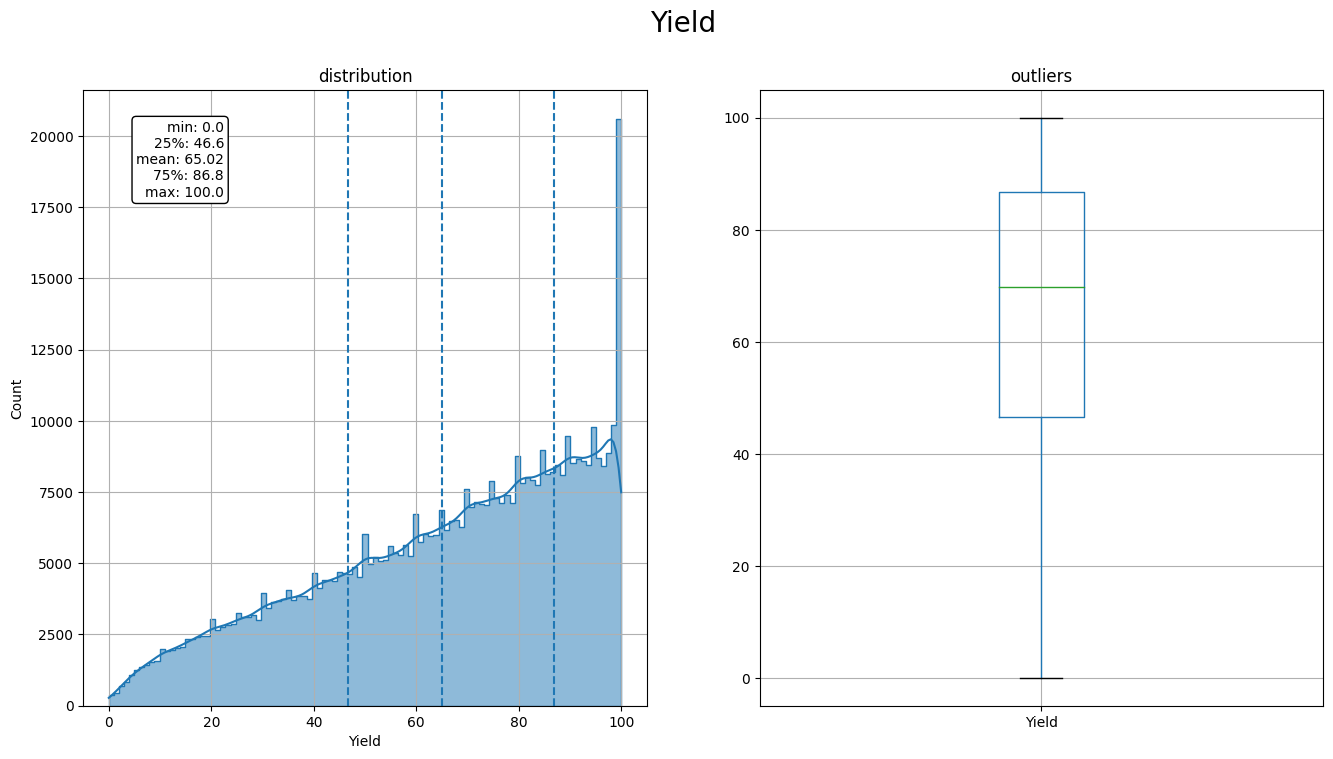

None


In [289]:
distribution(df, 'Yield')

In [290]:
print(df.shape)
df = df.loc[((df['num_dots'] == 0) | (df['num_dots' ] == 1))]


df['react1'] = df['react'].str.split('\.').str[0]
df['react2'] = df['react'].str.split('\.').str[-1]

df.loc[df['num_dots'] == 0, 'react2'] = np.nan
print(df.shape)

(526468, 6)
(491162, 8)


In [291]:
df = df.drop(columns=['num_dots'])
df.head()

,CanonicalizedReaction,Yield,dataset,react,products,react1,react2
11,CCOC(=O)CC1(O)Cc2ccccc2N(C)c2ccc(SCC)cc21>CCO....,82.0,train,CCOC(=O)CC1(O)Cc2ccccc2N(C)c2ccc(SCC)cc21,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21,CCOC(=O)CC1(O)Cc2ccccc2N(C)c2ccc(SCC)cc21,NaN
12,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21>CCO.Cl...,78.1,train,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21,CCSc1ccc2c(c1)C(CC(=O)O)=Cc1ccccc1N2C,CCOC(=O)C=C1Cc2ccccc2N(C)c2ccc(SCC)cc21,NaN
14,CCSc1ccc2c(c1)C(CC(=O)N(C)C)=Cc1ccccc1N2C>C1CC...,82.1,train,CCSc1ccc2c(c1)C(CC(=O)N(C)C)=Cc1ccccc1N2C,CCSc1ccc2c(c1)C(CCN(C)C)=Cc1ccccc1N2C,CCSc1ccc2c(c1)C(CC(=O)N(C)C)=Cc1ccccc1N2C,NaN
23,CC(C)(C)NNC(C)(C#N)C1CC1>BrBr.ClCCl.O>CC(C)(C)...,81.9,train,CC(C)(C)NNC(C)(C#N)C1CC1,CC(C)(C)N=NC(C)(C#N)C1CC1,CC(C)(C)NNC(C)(C#N)C1CC1,NaN
24,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCCC1>CC(=O)C1...,100.0,train,CC(C)(C)NNC(C)(C#N)C1CC1.O=C1CCCCCCC1,CC(C)(C)NNC1(C#N)CCCCCCC1,CC(C)(C)NNC(C)(C#N)C1CC1,O=C1CCCCCCC1


In [292]:
!pip install rdkit
!pip install drfp
from drfp import DrfpEncoder
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray

In [293]:
def get_mfp(x, radius, nBits):# 2 128
  '''Converts molecular smiles into fingerprint'''
  fp_array = np.zeros((0,), dtype=np.int8)
  if x is not None and type(x) != float:
    mol = Chem.MolFromSmiles(x)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
    ConvertToNumpyArray(fp, fp_array)
    return fp_array
  else:
    return np.zeros((nBits,), dtype=np.int8)

def get_drfp(reaction_smiles, n_folded_length, radius):
  '''Converts reaction SMILES into differential reaction fingerprint (DRFP)'''
  fp = DrfpEncoder.encode(reaction_smiles, n_folded_length=n_folded_length, radius=radius)
  return fp[0]

In [294]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True).head(100)

In [273]:
pharm_name = [f'Bit_{i}' for i in range(nBits)]
pharm_bits = [list(l) for l in bi]
df_pharm = pd.DataFrame(pharm_bits, index = train_data_df.ID, columns=pharm_name) #перевод в битовую строку + запись в новый датафрейм с индексом logV
df_pharm.head(1)

NameError: name 'nBits' is not defined

In [ ]:
df['react1'] = df['react1'].apply(lambda x: get_mfp(x, radius=2, nBits=128))
df['react2'] = df['react2'].apply(lambda x: get_mfp(x, radius=2, nBits=128))
df['products'] = df['products'].apply(lambda x: get_mfp(x, radius=2, nBits=128))

In [ ]:
df

In [ ]:
pharm_name = [f'Bit_{i}' for i in range(128)]
pharm_bits = [list(l) for l in df['products']]
df_pharm = pd.DataFrame(pharm_bits,columns=pharm_name) #перевод в битовую строку + запись в новый датафрейм с индексом logV
df_pharm.head(1)

In [123]:
df['CanonicalizedReaction'] = df['CanonicalizedReaction'].apply(lambda x: get_drfp(x, n_folded_length = 128, radius = 2))

In [296]:
df

,CanonicalizedReaction,Yield,dataset,react,products,react1,react2
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",92.7,train,CC(N)c1cc(F)cc(F)c1.CCOc1ccc(C(=O)c2cccc([N+](...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",75.0,train,CC(C)(C)Nc1nc(S(C)(=O)=O)ncc1C(N)=O.N[C@@H]1CC...,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",76.0,train,CSc1nccc(I)n1.Cc1nc(C)c(B2OC(C)(C)C(C)(C)O2)s1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",88.1,train,C1COCCN1.CS(=O)(=O)c1cccc(-c2ccc(-c3cc(C(F)(F)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",75.4,valid,CC(=O)CC(=O)OC(C)(C)C.CCOC(=O)CCCCI,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
95,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",53.0,train,CCOc1ccccc1CCOS(C)(=O)=O.NC(=O)c1ccnc(-c2c[nH]...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,"[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...",37.4,train,CS(=O)(=O)Nc1ccc(B(O)O)cc1.Cc1cc(C)c(CNC(=O)c2...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",91.0,train,CC(=O)c1ccc(Cl)cc1.C[C@H](N)c1ccc(Cl)cc1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",88.5,train,CCCCCN1C(=O)C(CCC(=O)OC)(NC(=O)c2ccc(Cl)c(Cl)c...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 92
[LightGBM] [Info] Start training from score 65.128261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

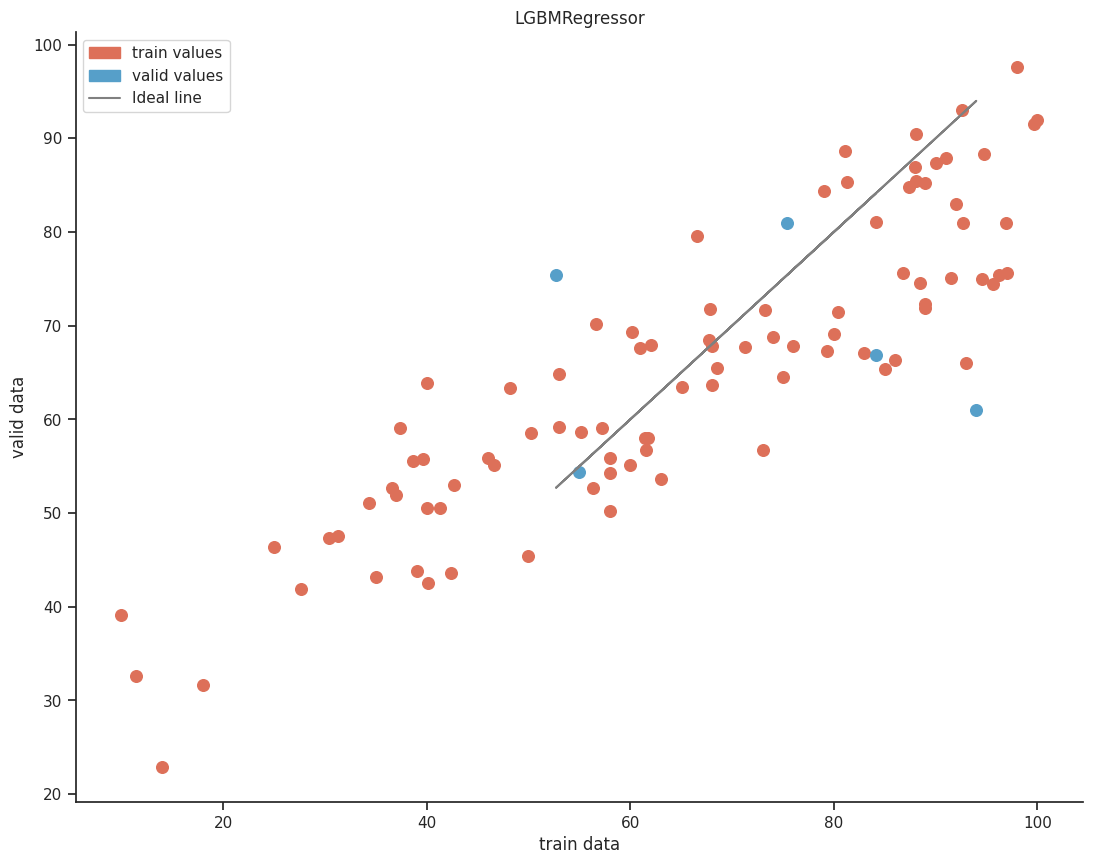

AttributeError: 'numpy.uint8' object has no attribute 'split'

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import matplotlib.pylab as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
import seaborn as sns
from matplotlib.patches import Patch


for i in range(9, 12):
  dvoyka = 2**i

  df['react1'] = df['react1'].apply(lambda x:get_mfp(x, radius=2, nBits=dvoyka))
  df['react2'] = df['react2'].apply(lambda x: get_mfp(x, radius=2, nBits=dvoyka))
  df['products'] = df['products'].apply(lambda x: get_mfp(x, radius=2, nBits=dvoyka))


  pharm_name = [f'Bit_1_{i}' for i in range(dvoyka)]
  pharm_bits = [list(l) for l in df['products']]
  df_pharm_1 = pd.DataFrame(pharm_bits,columns=pharm_name) #перевод в битовую строку + запись в новый датафрейм с индексом logV

  pharm_name = [f'Bit_2_{i}' for i in range(dvoyka)]
  pharm_bits = [list(l) for l in df['react1']]
  df_pharm_2 = pd.DataFrame(pharm_bits,columns=pharm_name) #перевод в битовую строку + запись в новый датафрейм с индексом logV

  pharm_name = [f'Bit_3_{i}' for i in range(dvoyka)]
  pharm_bits = [list(l) for l in df['react2']]
  df_pharm_3 = pd.DataFrame(pharm_bits,columns=pharm_name) #перевод в битовую строку + запись в новый датафрейм с индексом logV

  new_df = pd.concat([df_pharm_1, df_pharm_2, df_pharm_3], axis = 1)
  for j in range(9, 12):
    dvoyechka = 2**j


    df['CanonicalizedReaction'] = df['CanonicalizedReaction'].apply(lambda x: (get_drfp(x, n_folded_length = dvoyechka, radius = 2)))

    pharm_name = [f'Bit_4_{i}' for i in range(dvoyechka)]
    pharm_bits = [list(l) for l in df['CanonicalizedReaction']]
    df_pharm_4 = pd.DataFrame(pharm_bits,columns=pharm_name)
    new_df = pd.concat([new_df, df_pharm_4], axis = 1)
    new_df['dataset'] = df['dataset']
    new_df['Yield'] = df['Yield']

    X_train = new_df[new_df['dataset'] == 'train'].drop(columns=['Yield', 'dataset'])
    X_test = new_df[new_df['dataset'] =='test'].drop(columns=['Yield', 'dataset'])
    X_valid = new_df[new_df['dataset'] =='valid'].drop(columns=['Yield', 'dataset'])
    y_train = new_df[new_df['dataset'] =='train']['Yield']
    y_test = new_df[new_df['dataset'] =='test']['Yield']
    y_valid = new_df[new_df['dataset'] =='valid']['Yield']


    train_data = lgb.Dataset(X_train, y_train)
    valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

    params = {'boosting_type': 'gbdt'}

    gbm = lgb.train(params, train_set = train_data,
                valid_sets=[valid_data])



    print('Starting predicting...')
    y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)


    rmse_test = mean_squared_error(y_valid, y_pred) ** 0.5
    print(f'The RMSE of prediction is: {rmse_test}')


    mae = mean_absolute_error(y_valid, y_pred)
    print("Mean Absolute Error (MAE):", mae)

    r2 = r2_score(y_valid, y_pred)
    print("R2 Score:", r2)

    y1_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
    print(dvoyka, dvoyechka)
    print('r2_test:', metrics.r2_score(y_valid, y_pred))
    print('MAE_test:', metrics.mean_absolute_error(y_valid, y_pred))
    print('MSE_test:', metrics.mean_squared_error(y_valid, y_pred))
    print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    print('')
    real_patch = Patch(color='#DD7059', label='train values')
    pred_patch = Patch(color='#569FC9', label='valid values')
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    f, ax = plt.subplots(figsize=(13, 10))
    plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
    plt.scatter(y_valid, y_pred, color='#569FC9',s=70)
    plt.plot(y_valid, y_valid, color='gray')
    plt.legend(handles=[real_patch, pred_patch, plt.Line2D([], [], color='gray', label='Ideal line')])
    plt.title('LGBMRegressor')
    plt.xlabel('train data')
    plt.ylabel('valid data')
    plt.show()
    #plt.savefig(f'figure{dvoyka}+{dvoyechka}')
